<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Actividad_2_1_2_Escalamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 2_1_2:** Escalamiento de datos
Jesús Roque Armas Martín, basado en cuaderno de Salvador Bordón


In [9]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

**Ejercicio 2 a)** Cálculo de las variables estadísticas de los diez primeros números


In [10]:
#declaración del array X
X=np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
X=np.array([1,2,3,4,5,6,7,8,9,10])
Data = pd.DataFrame(X, columns=['Números'])
media = np.mean(X)
mediana = np.median(X)
dev_std = np.std(X)
numpy_std = np.std(X,ddof=1)
varianza = np.var(X)
rango = np.max(X)-np.min(X)

print(f" Media ={media}")
print(f" Mediana ={mediana}")
print(f" Desviación estándar poblacional ={dev_std}")
print(f" Desviación estándar muestral ={numpy_std}")
print(f" Varianza ={varianza}")
print(f" Rango ={rango}")


 Media =5.5
 Mediana =5.5
 Desviación estándar poblacional =2.8722813232690143
 Desviación estándar muestral =3.0276503540974917
 Varianza =8.25
 Rango =9


Utilizar describe para realizar los cálculos de las variables estadísticas

In [11]:
x_pandas= pd.Series([1,2,3,4,5,6,7,8,9,10])
x_pandas.std(ddof=0)
x_pandas.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64

**Ejercicio 2d)**
Estandarizar variable mediante rangos y calcular media y mediana de la variable escalada por rangos


 Media =0.5
 Mediana =0.5


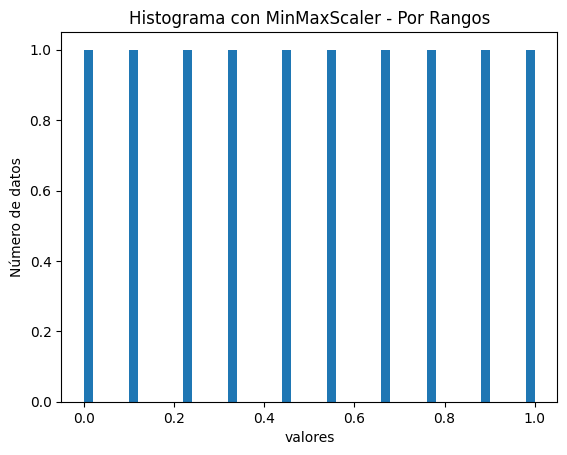

In [12]:
Data = pd.DataFrame(x_pandas, columns=['numeros'])
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer([('scale', MinMaxScaler(), numeric_cols )],remainder='passthrough')

Data_prep_RR = preprocessor_RR.fit_transform(Data)
#Data_prep_RR.describe()
media=np.mean(Data_prep_RR)
mediana=np.median(Data_prep_RR)

print(f" Media ={media}")
print(f" Mediana ={mediana}")

plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

Repetir mediante escalamiento Z- score

 Media =-6.661338147750939e-17
 Mediana =0.0


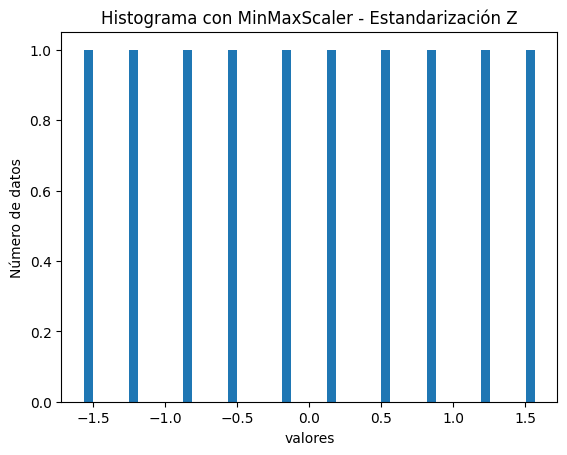

In [13]:
# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
Data = pd.DataFrame(x_pandas, columns=['numeros'])
preprocessor_SS = ColumnTransformer([('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)

media=np.mean(Data_prep_SS)
mediana=np.median(Data_prep_SS)

print(f" Media ={media}")
print(f" Mediana ={mediana}")

plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Estandarización Z')
plt.show()